<font color='mediumblue'> **Projet : Consommation et production électrique en France** </font>

# Régional

In [ ]:
#Add

# 2.1 (Régional) Concaténer les données régionales annuelles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 3
import glob
import os

In [2]:
directory = '../data/data_rte'
file_pattern = 'eCO2mix_RTE*.zip'
specific_files = glob.glob(os.path.join(directory, file_pattern))
filtered_files1 = [file for file in specific_files if not file.startswith('eCO2mix_RTE_Annuel-Definitif_')]
filtered_files2 = [file for file in filtered_files1 if not file.endswith('2019.zip')]
filtered_files3 = [file for file in filtered_files2 if not file.endswith('2020.zip')]
#for file_path in filtered_files3:
#    print(file_path)

regional_df = pd.concat((pd.read_csv(filename, sep='\t', encoding='latin1', index_col=False, low_memory=False) for filename in filtered_files3))
regional_df.head()

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Thermique,Unnamed: 13
0,France,Données définitives,2012-01-01,00:00,58315.0,58200.0,58200.0,492.0,25.0,3816.0,...,ND,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
1,France,Données définitives,2012-01-01,00:15,NaN,57700.0,57550.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données définitives,2012-01-01,00:30,58315.0,57200.0,56900.0,492.0,25.0,3816.0,...,ND,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
3,France,Données définitives,2012-01-01,00:45,NaN,56200.0,56000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Données définitives,2012-01-01,01:00,56231.0,55200.0,55100.0,492.0,25.0,3834.0,...,ND,ND,ND,ND,ND,ND,ND,ND,NaN,NaN


# 2.2 (Régional) construire un index de datetime à partir des colonnes 'Date' et 'Heures'

In [3]:
#print(regional_df[['Date', 'Heures']])

In [4]:
#print(regional_df['Périmètre'].unique

In [5]:
Format = '%Y-%m-%d %H:%M'
regional_df = regional_df.dropna(subset = ['Date', 'Heures'], how = "any")
regional_df ['Datetime'] = pd.to_datetime(regional_df['Date'] + ' ' + regional_df['Heures'], format = Format)
#regional_df = regional_df.set_index(pd.DatetimeIndex(regional_df['Datetime']))

In [6]:
regional_dfdt = regional_df.drop(['Date', 'Heures'], axis = 1)
regional_dfdt.head()

,Périmètre,Nature,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,Eolien,...,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Thermique,Unnamed: 13,Datetime
0,France,Données définitives,58315.0,58200.0,58200.0,492.0,25.0,3816.0,52697.0,3588.0,...,ND,ND,ND,ND,ND,ND,ND,NaN,NaN,2012-01-01 00:00:00
1,France,Données définitives,NaN,57700.0,57550.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01 00:15:00
2,France,Données définitives,58315.0,57200.0,56900.0,492.0,25.0,3816.0,52697.0,3588.0,...,ND,ND,ND,ND,ND,ND,ND,NaN,NaN,2012-01-01 00:30:00
3,France,Données définitives,NaN,56200.0,56000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01 00:45:00
4,France,Données définitives,56231.0,55200.0,55100.0,492.0,25.0,3834.0,51747.0,3536.0,...,ND,ND,ND,ND,ND,ND,ND,NaN,NaN,2012-01-01 01:00:00


In [7]:
#regional_dfdt.loc['2012'].head()

In [8]:
#regional_dfdt.loc['2012'].count()

# 2.2+ (Régional) construire un Multindex 

In [9]:
regional_df.set_index(['Périmètre','Datetime'], inplace = True)

In [10]:
regions = regional_df.drop(['Nature'], axis = 1)
regions = regional_df.drop(['France'], axis = 0)
regions

C:\Users\eusou\AppData\Local\Temp\ipykernel_1708\306168563.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  regions = regional_df.drop(['France'], axis = 0)


Nature        Date  \
Périmètre            Datetime                                               
Auvergne-Rhône-Alpes 2013-01-01 00:00:00  Données définitives  2013-01-01   
                     2013-01-01 00:15:00  Données définitives  2013-01-01   
                     2013-01-01 00:30:00  Données définitives  2013-01-01   
                     2013-01-01 00:45:00  Données définitives  2013-01-01   
                     2013-01-01 01:00:00  Données définitives  2013-01-01   
...                                                       ...         ...   
Pays-de-la-Loire     2018-12-31 22:45:00  Données définitives  2018-12-31   
                     2018-12-31 23:00:00  Données définitives  2018-12-31   
                     2018-12-31 23:15:00  Données définitives  2018-12-31   
                     2018-12-31 23:30:00  Données définitives  2018-12-31   
                     2018-12-31 23:45:00  Données définitives  2018-12-31   

                                         Heures Consommation  Prévision J-1  \
Périmètre            Datetime                                                 
Auvergne-Rhône-Alpes 2013-01-01 00:00:00  00:00           ND            NaN   
                     2013-01-01 00:15:00  00:15          NaN            NaN   
                     2013-01-01 00:30:00  00:30         8173            NaN   
                     2013-01-01 00:45:00  00:45          NaN            NaN   
                     2013-01-01 01:00:00  01:00         7944            NaN   
...                                         ...          ...            ...   
Pays-de-la-Loire     2018-12-31 22:45:00  22:45          NaN            NaN   
                     2018-12-31 23:00:00  23:00       3754.0            NaN   
                     2018-12-31 23:15:00  23:15          NaN            NaN   
                     2018-12-31 23:30:00  23:30       3612.0            NaN   
                     2018-12-31 23:45:00  23:45          NaN            NaN   

                                          Prévision J  Fioul  Charbon  Gaz  \
Périmètre            Datetime                                                
Auvergne-Rhône-Alpes 2013-01-01 00:00:00          NaN    NaN      NaN  NaN   
                     2013-01-01 00:15:00          NaN    NaN      NaN  NaN   
                     2013-01-01 00:30:00          NaN    NaN      NaN  NaN   
                     2013-01-01 00:45:00          NaN    NaN      NaN  NaN   
                     2013-01-01 01:00:00          NaN    NaN      NaN  NaN   
...                                               ...    ...      ...  ...   
Pays-de-la-Loire     2018-12-31 22:45:00          NaN    NaN      NaN  NaN   
                     2018-12-31 23:00:00          NaN    NaN      NaN  NaN   
                     2018-12-31 23:15:00          NaN    NaN      NaN  NaN   
                     2018-12-31 23:30:00          NaN    NaN      NaN  NaN   
                     2018-12-31 23:45:00          NaN    NaN      NaN  NaN   

                                         Nucléaire  ... Gaz - CCG  \
Périmètre            Datetime                       ...             
Auvergne-Rhône-Alpes 2013-01-01 00:00:00        ND  ...       NaN   
                     2013-01-01 00:15:00       NaN  ...       NaN   
                     2013-01-01 00:30:00     12069  ...       NaN   
                     2013-01-01 00:45:00       NaN  ...       NaN   
                     2013-01-01 01:00:00     11895  ...       NaN   
...                                            ...  ...       ...   
Pays-de-la-Loire     2018-12-31 22:45:00       NaN  ...       NaN   
                     2018-12-31 23:00:00         -  ...       NaN   
                     2018-12-31 23:15:00       NaN  ...       NaN   
                     2018-12-31 23:30:00         -  ...       NaN   
                     2018-12-31 23:45:00       NaN  ...       NaN   

                                         Gaz - Autres  \
Périmètre            Datetime                          

In [11]:
regions.replace('ND',np.nan, inplace=True)
regions.replace('-',np.nan, inplace=True)
#regions

In [12]:
regions.sample(6)
#regions.info()

,,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,...,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Thermique,Unnamed: 13
Périmètre,Datetime,,,,,,,,,,,,,,,,,,,,,
PACA,2018-03-18 18:30:00,Données définitives,2018-03-18,18:30,5230.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,832.0,NaN
Nouvelle-Aquitaine,2014-08-05 18:30:00,Données définitives,2014-08-05,18:30,4264.0,NaN,NaN,NaN,NaN,NaN,2882.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN
Occitanie,2017-09-24 04:45:00,Données définitives,2017-09-24,04:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bourgogne-Franche-Comté,2017-07-23 01:45:00,Données définitives,2017-07-23,01:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ile-de-France,2015-03-27 01:15:00,Données définitives,2015-03-27,01:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pays-de-la-Loire,2013-04-18 21:15:00,Données définitives,2013-04-18,21:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2.3 (Régional) Tracer sur un même graphique la consommation des différentes régions en fonction du temps

<AxesSubplot:xlabel='Datetime'>

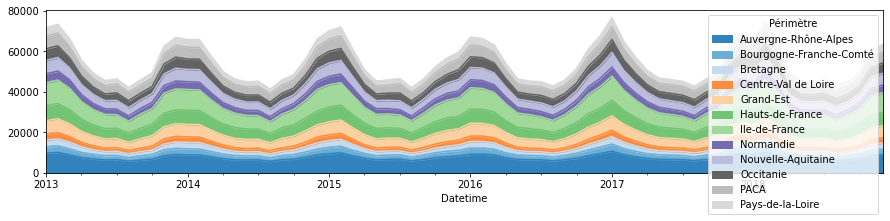

In [13]:
regions['Consommation'] = pd.to_numeric(regions['Consommation'], errors='coerce')
#regions.dtypes
regions['Consommation'].dropna(inplace=True)

regions_prod = regions['Consommation'].unstack(level=0).resample('M').mean()
#regions_prodx = regions_prod.drop(['France'], axis = 1)
regions_prod = regions_prod.dropna(how='all')
regions_prod.plot.area(cmap ='tab20c')

In [14]:
#====
#test = regions
#test.dtypes

#test['Consommation'] = pd.to_numeric(test['Consommation'], errors='coerce')
#test.dtypes
#test['Consommation'].dropna(inplace=True)

#regions_test = test['Consommation'].unstack(level=0).resample('M').mean()
#Fr = regions_test.drop(['France'], axis = 1)
#Fr = Fr.dropna(how='all')
#Fr.plot.area(cmap ='tab20c')

#====

In [15]:
import matplotlib.pyplot as plt

#a = regions_prodx.resample('Y').sum()

# Define the size of each individual pie chart
individual_pie_size = (8, 8)  # You can adjust the size as needed

# Create a new figure for the pie charts
#fig, axes = plt.subplots(nrows=len(a.index), figsize=(individual_pie_size[0], individual_pie_size[1] * len(a.index)))

for i, yr in enumerate(a.index):
    # Calculate the sum of values for the current year
    year_data = a.loc[yr]

    # Create a pie chart with percentages formatted as 'X.X%'
    axes[i].pie(year_data, autopct='%1.1f%%', colors=plt.cm.Paired.colors)

    # Add a title to the pie chart
    axes[i].set_title(yr)

#plt.tight_layout()  # Adjust subplot spacing for better visualization
#plt.show()


NameError: name 'a' is not defined

# 2.4 (Régional) Quelles régions sont les plus consommatrices ? 

Y a-t-il un moment dans l'année où la région IdF n'est pas la plus consommatrice ? 

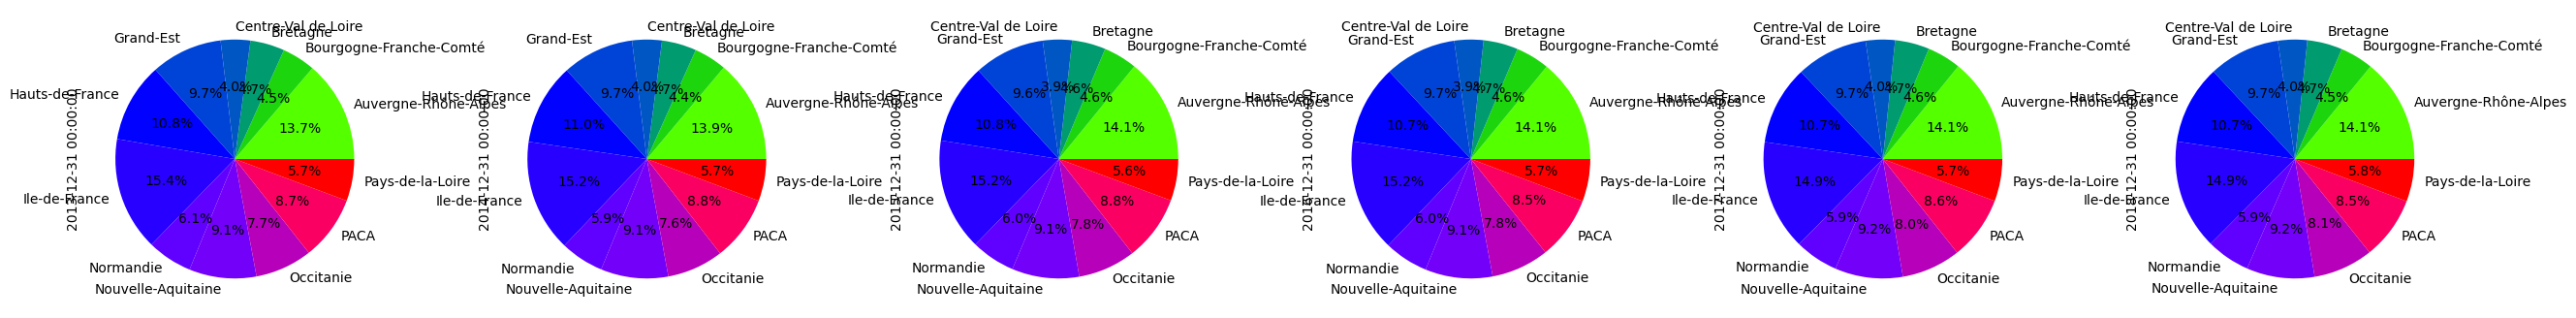

In [26]:

a = regions_prod.resample('Y').sum()
fig, axes = plt.subplots(ncols = len(a.index), figsize = (32, 4))
for i, yr in enumerate(a.index):

    a.loc[yr].plot.pie(ax = axes[i], cmap = 'prism_r', autopct='%1.1f%%')



Peut-on observer des différences comportementales significatives entre les régions ? (par ex entre une région du nord et une région du sud)

# 2.5 (Régional) Afficher la production nucléaire par région en ftc du temps 

Dans quelles régions sont situées les centrales nucléaires ?

In [ ]:
#regions['Nucléaire']

<AxesSubplot:xlabel='Datetime'>

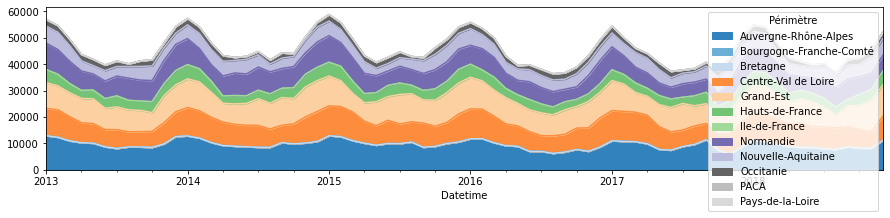

In [17]:
regions['Nucléaire'] = pd.to_numeric(regions['Nucléaire'], errors='coerce')
regions['Nucléaire'].dropna(inplace=True)

regions_nucx = regions['Nucléaire'].unstack(level=0).resample('M').mean()
#regions_nucx = regions_nucx.drop(['France'], axis = 1)
regions_nucx = regions_nucx.dropna(how='all')
regions_nucx.plot.area(cmap ='tab20c')

In [ ]:
#regions_nucx

# 2.6 (Régional) Quelles régions produisent le plus de solaire / éolien ? 

In [ ]:
#regions.info() #Eolien is object(str). So I have to converted it to float

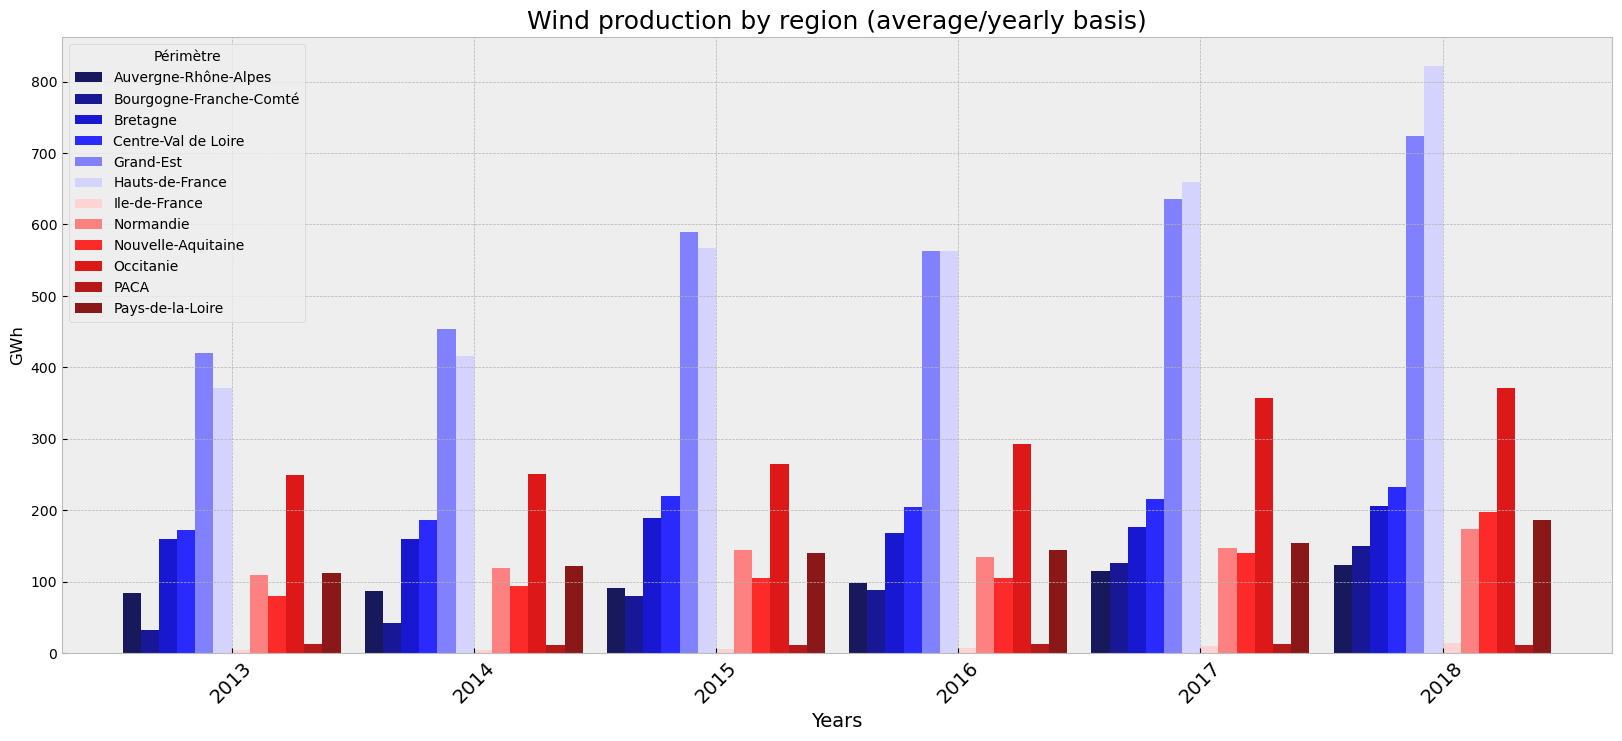

In [53]:
#Calculate mean of solar and wind energy over the period 2012-2018 for each region.

# Calculating the yearly mean of Wind energy for each region.
regions['Eolien'] = pd.to_numeric(regions['Eolien'], errors = 'coerce')
regions['Eolien'].dropna(inplace = True)
regions_s_e = regions['Eolien'].unstack(level=0).resample('Y').mean()
#regions_s_e.plot.area(cmap = 'bwr', alpha = 0.9)

rcParams['figure.figsize'] = 20, 8
ax = regions_s_e.plot(kind = 'bar', width = 0.9, cmap = 'seismic', alpha = 0.9)
plt.style.use('bmh')
x_labels = regions_s_e.index.strftime('%Y') 
ax.set_xticklabels(x_labels, rotation=45, fontsize = 14)  
plt.title('Wind production by region (average/yearly basis)', fontsize = 18)
plt.xlabel('Years', fontsize = 14)
plt.ylabel('GWh', fontsize = 12)

plt.show()
#plt.style.use("default")


In [55]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2524032 entries, ('Auvergne-Rhône-Alpes', Timestamp('2013-01-01 00:00:00')) to ('Pays-de-la-Loire', Timestamp('2018-12-31 23:45:00'))
Data columns (total 37 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   Nature                                object 
 1   Date                                  object 
 2   Heures                                object 
 3   Consommation                          float64
 4   Prévision J-1                         float64
 5   Prévision J                           float64
 6   Fioul                                 float64
 7   Charbon                               float64
 8   Gaz                                   float64
 9   Nucléaire                             float64
 10  Eolien                                float64
 11  Solaire                               object 
 12  Hydraulique                           object 
 13  Pompage      

# 2.7 (Régional) Observer les informations concernant la région AuRA.

In [ ]:
regions['Eolien', 'Solaire'] = pd.to_numeric(regions['Eolien', 'Solaire'], errors='coerce')

#regions.dtypes
regions['Eolien', 'Solaire'].dropna(inplace=True)
regions['Eolien', 'Solaire']

Retrouver la signification du signe des échanges

# 2.8 (Régional) Pourquoi la région est-elle autant exportatrice ? 

**Objectifs**
    
1. Charger et nettoyer des données : read_csv, parse date, concat
2. Manipuler les données pour mieux les comprendre : groupby, pivot, stack/unstack

## Création des dataframes
**TODO**
        
1. Créer deux dataframes:
    - le 1er en concaténant les données nationales annuelles 
    - le 2nd en concaténant les données régionales annuelles
    - il faudra construire un index de datetime à partir des colonnes 'Date' et 'Heures'

**Aide**
- bien lire la note sur les données RTE afin de comprendre sur quelles données on travaille ...
- la méthode read_csv (pandas) peut lire les fichiers zip ;-) (encoding: latin-1, séparateur de colonnes: \t)
- un tips pour détecter l'encoding: https://superuser.com/questions/301552/how-to-auto-detect-text-file-encoding
- la méthode listdir (os) peut vous aider à lister tous les fichiers d'un dossier, startswith à sélectionner ceux qui vous intéressent
- pensez à "droper" les colonnes qui ne contiennent pas d'information
- pour le dataframe des données régionales, vous pouvez utiliser un multiindex
- certaines colonnes sont vides ? https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

**Notes sur les données RTE** 
- Elles proviennent du (génial) site éCO2mix et sont disponibles pour tout le monde (opendata)
- Leur format n'est pas optimal : un peu de manipulation est nécessaire afin de pouvoir les exploiter. Pas de panique, il faut juste procéder par étape !
    1. Chargez un des fichiers directement avec read_csv (n'importe lequel, ils sont tous construits de la même façon)
    2. Affichez le dataframe obtenu, et essayez de comprendre ce qui cloche ...
    3. Les quelques lignes de code suivante permettent d'afficher la 1ere et la 10ème ligne contenues dans un fichier. Est-ce que le problème apparait plus clairement ? (pensez à modifier le chemin d'accès...)
    4. Ecrivez une fonction qui permet de charger correctement un des fichiers
    5. Vous pouvez maintenant utiliser cette fonction pour créer votre dataframe en concaténant les fichiers

**Plus d'informations sur les données :** <br/> 
- https://www.rte-france.com/eco2mix <br/>
- https://www.rte-france.com/eco2mix/telecharger-les-indicateurs

Les données que nous allons traiter sont sous un format nouveau, il peut s'avérer difficile de les importer pour vous : fixez vous un objectif à ne pas passer plus de 2h à les importer. Si vous dépassez ce temps, je vous conseille de vous référer aux codes cachés que je vous transmets ci-dessous et de vous replonger dedans plus tard afin que vous ayez le temps d'explorer les données.

<details><summary>Code import données nationales</summary><br>
def create_datetime_index(df):<br/>
    df['DateTime'] = pd.to_datetime(df['Date'].map(str) + ' ' + df['Heures'].map(str))<br/>
    df.drop(['Date', 'Heures'], axis=1, inplace=True)<br/>
    df.set_index('DateTime', inplace=True)<br/>
    return <br/>

def read_rte_file(file_name):<br/>
    df = pd.read_csv(file_name, encoding='ISO-8859-1', sep='\t', index_col=None, header=None, skiprows=1, na_values='ND')<br/>
    df.drop(df.columns[-1], axis=1, inplace=True)<br/>
    df_titles = pd.read_csv(file_name, encoding='ISO-8859-1', sep='\t', index_col=None, nrows=0)<br/>
    df.columns = df_titles.columns<br/>
    return df<br/>

DATA_FILE = 'data/data_rte/'<br/>

files = [f for f in listdir(DATA_FILE) if f.startswith('eCO2mix_RTE_Annuel-Definitif')]<br/>

df_all = []<br/>

for f in files:<br/>
    df = read_rte_file(DATA_FILE+f)<br/>
    df_all.append(df)<br/>
df_all = pd.concat(df_all)<br/>
df_all = df_all[(\~df_all['Date'].isna())&(~df_all['Heures'].isna())]<br/>
create_datetime_index(df_all)<br/>
df_all.describe()<br/>
</details>

**Note : In a loop it is not a good idea to concat the dataframe at each step, because it will sort each dataframe and this will takes a lot of time. A better solution is to create a list of dataframes and concat at the end of the loop (as is done here).**

<details><summary>Code import données régionales</summary><br>
files = [f for f in listdir(DATA_FILE) if not f.startswith('eCO2mix_RTE_Annuel-Definitif')]<br/>

list_reg = set([f[len('eCO2mix_RTE_'):-len('_Annuel-Definitif_2013.zip')] for f in files])<br/>

df_all_reg = {}<br/>

for reg in list_reg:<br/>
    df_reg = []<br/>
    for f in files :<br/>
        if reg in f :<br/>
            df = read_rte_file(DATA_FILE+f)<br/>
            df.drop(len(df)-1, inplace=True)<br/>
            create_datetime_index(df)<br/>
            df_reg.append(df)<br/>
    df_reg = pd.concat(df_reg)<br/>
    df_reg.drop(['Périmètre', 'Nature'], axis=1, inplace=True)<br/>
    df_reg.dropna(how='all', inplace=True)<br/>
    df_all_reg[reg] =df_reg<br/>
df_all_reg = pd.concat(df_all_reg, axis=1)<br/>
</details>

## Exploration du dataset

### Réflexion

A présent vous savez ce que vous avez dans vos données (cf. https://www.rte-france.com/eco2mix)<br/>

Avant de vous lancer dans la mise en pratique, prenez quelques minutes (max 30 minutes) pour observer les données et les premières statistiques descriptives que vous avez trouvées : quelles questions vous posez-vous sur les données ? Qu'avez-vous envie d'explorer ? (essayez de ne pas vous laisser biaiser par les titres du Notebook)

### Mise en application

**TODO**
    
L'objectif ici est de **comprendre les données** présentes dans les deux dataframes que vous avez créés. Réfléchissez aux descripteurs statistiques les plus appropiés pour chaque question.  
<br/>

1. Dataset national
    - Tracer la consommation nationale en fonction du temps
    - Tracer la production des différentes sources. Quelle est la source de production largement majoritaire ?
    - Afficher sur un même graphique : la production nucléaire, la consommation et la somme des échanges aux frontières. En déduire la signification du signe des échanges (positif ou négatif) ?
    - Quelles sources ont un fonctionnement
        - de "base" (production régulière) ?
        - de "pointe" (production ponctuelle, uniquement lorsque la base ne suffit plus) ?

 <br/>
2. Dataset régional
    - Tracer sur un même graphique la consommation des différentes régions en fonction du temps
    - Peut-on observer des différences comportementales significatives entre les régions ? (par ex entre une région du nord et une région du sud)
    - Quelles régions sont les plus consommatrices ? Y a-t-il un moment dans l'année où la région IdF n'est pas la plus consommatrice ?
    - Afficher la production nucléaire par région en ftc du temps. Dans quelles régions sont situées les centrales nucléaires ?
    - Quelles régions produisent le plus de solaire / éolien ?
    - Observer les informations concernant la région AuRA. Retrouver la signification du signe des échanges ? Pourquoi la région est-elle autant exportatrice ?

**Aide**
- la méthode **.plot()** fonctionne parfaitement avec un datetime en index
- si vous utilisez un multiindex, la méthode **swaplevel** peut vous aider
- attention aux **nan** pour les plots..

### Dataset national

#### consommation nationale en fonction du temps

#### production des différentes sources

#### production nucléaire, consommation et échanges aux frontières

#### fonctionnement de base ou ponctuel ?

### Dataset régional


Attention à bien nuancer nos propos dans cette partie là : chaque région n'est pas égale en population, en superficie,...
- https://www.ined.fr/fr/tout-savoir-population/chiffres/france/structure-population/regions-departements/
- https://www.regions-departements-france.fr/regions-francaises.html

#### Manipulation de notre dataframe avec les index : récupération de la consommation par région

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

#### consommation en fonction du temps

#### différences comportementales entre les régions

#### les plus consommatrices

#### production nucléaire

#### production solaire / éolien


## Comparaison des situations régionales

**TODO**

1. Autonomie électrique des régions : 
    - Afficher la 'consommation - sum(productions)' pour chaque région
    - Quelles régions sont autonomes ? En excès ? En déficit ?
    - Comparer ce résultat à la colonne 'Ech. physiques'
    - Bonus: reconstruire les flux inter-régionaux ...

    
2. Etude de la production solaire :
    - Quelle région produit le plus (en moyenne et au max) ? 
    - Quelle évolution sur les dernières années ?
    - Quelle région a le meilleur taux 'énergie produite / puissance installée' ? (la puissance installée peut être assimilée au maximum produit, attention cette capacité peut augmenter dans le temps...)

    
3. Mêmes questions pour l'éolien
    

**Aide**


- Les méthodes groupby, unstack, ou pivot sont très utiles pour manipuler des dataframes


### Autonomie électrique des régions

#### Afficher la 'consommation - sum(productions)' pour chaque région

#### Quelles régions sont autonomes ? en exces ? en déficit ?

#### Comparer ce résultat à la colonne 'Ech. physiques'

#### Bonus : reconstruire les flux inter-régionaux ...

### Etude de la production solaire

### Mêmes questions pour l'éolien

## Etude des consommations 

**TODO**


1. Afficher les moyennes des consommations régionales pour chaque année, avec et sans standardisation. Quelles informations visualisez vous ?
    
2. Faire pareil avec la moyenne de consommation selon le jour de la semaine.

3. Tracer les consommations horaires (par heure) moyenne par région en décembre et en juin. Peut-on observer les différences d'ensoleillement entre les régions ?

4. Tracer ces mêmes courbes, en ne sélectionnant que les jours de semaine, puis que les jours de week end. Quelles différences de comportement peut-on observer ?


**Aide**

- un DatetimeIndex possède de nombreux attributs et méthodes utiles: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html
- Regarder la doc des méthodes groupby, unstack, pivot...
- Si besoin, utiliser la méthode seaborn.heatmap pour visualiser vos résultats (cmap="YlGnBu")



#### moyennes des consommations régionales pour chaque année, avec et sans standardisation

#### moyenne de consommation selon le jour de la semaine

#### consommations décembre vs juin

#### consommation semaine vs week end

# Relation entre les features / variables

## Liens productions / consommation

**TODO**
        
- Afficher les correlations entre toutes les productions et la consommation
- Quelles éléments sont corrélés parce que liés ? Quels éléments sont corrélés mais n'ont à priori pas de lien de cause à effet ?
- Quel indice montre que la consommation 'cause' la production avec du gaz ?
- Quels types de productions permettent de "suivre" la consommation ? Lesquels ne le permettent pas du tout (productions "fatales")
- Choisissez une ou deux régions et observez ces mêmes corrélations.

BONUS : Visualisation de la PCA :
- La consommation nationale et la production nucléaire sont fortement correlées. Tracer un scatterplot de l'une en fct de l'autre.
- Effectuer une PCA pour passer de deux dimensions à une seule, puis visualiser sur le plot précédent la composante obtenue.

Le nucléaire produit beaucoup, mais est peu pilotable. <br/>
En revanche le gaz est allumé lorsqu'il y a beaucoup de demande : la demande cause la production de gaz.

### Au niveau national

#### Afficher les correlations entre toutes les productions et la consommation

#### Quels éléments sont corrélés parce que liés ? Quels éléments sont corrélés mais n'ont à priori pas de lien de cause à effet ?

Les corrélations peuvent être dues à une relation de causalité, par exemple, une hausse rapide de la consommation va entrainer une hausse de la production avec du gaz. Ainsi on peut noter que la production de gaz suit une hausse de la consommation. Ce genre d'intuition est à l'origine de la notion de [causalité de Granger](https://en.wikipedia.org/wiki/Granger_causality)

#### Quel indice montre que la consommation 'cause' la production avec du gaz?

Ci dessous on vérifie que la production de gaz suit en moyenne la hausse de la consommation :<br/>
An idea from: https://stackoverflow.com/questions/33171413/cross-correlation-time-lag-correlation-with-pandas

#### Quels types de productions permettent de "suivre" la consommation ? Lesquels ne le permettent pas du tout (productions "fatales")

### Au niveau régional

## Prix de l'électricité

On s'intéresse maintenant aux données dans le dossier "data entsoe".<br/>
https://doc.opendatadsl.com/docs/company/ENTSOE#entsoe_el_tl_actcf

**TODO**

- Charger les prix de marché de l'électricité  (en France et en Allemagne)  <br/>
- Chercher les liens (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) entre : 
    - Le prix de l'électricité et la consommation nationale ?
    - Le prix de l'électricité et les sources de production ? 
    - Quelles sources semblent associées aux prix élevés ? aux prix faibles ?
            
**Aide:**

- Attention aux timezone ! Les prix sont en UTC. Les méthodes **tz_localize('UTC') et tz_convert('Europe/Paris')** pourraient vous aider ...
- On ne peut pas comparer timeserie "localisée" avec une autre qui ne l'est pas ("naive")
- Pour associer le dataframe de conso/prod à une timezone : les changements d'heures ont mal été gérés (cherchez à comprendre le problème). Utliser **"ambiguous = 'NaT', nonexistent='NaT'"** pour le contourner.
- Y a-t-il des **outliers** ?

#### Charger les prix de marché de l'électricité (en France et en Allemagne)

<details><summary>Code import données électricité</summary><br>
def read_data_entsoe(file):<br/>
    df = pd.read_csv(file)<br/>
    df['start'], _ = df['MTU (UTC)'].str.split(' - ', 1).str<br/>
    df.set_index('start', inplace=True)<br/>
    df.index = pd.to_datetime(df.index, yearfirst=True)<br/>
    df.drop(columns=['MTU (UTC)'], inplace=True)<br/>
    return df<br/>
    
DATA_FILE = './data/data entsoe/France/'<br/>

def get_prices(folder, col='fr'):<br/>
    df_prices = []<br/>
    for f in listdir(folder):<br/>
        df = read_data_entsoe(folder + f)<br/>
        df.columns = [col]<br/>
        df_prices.append(df)<br/>
    df_prices= pd.concat(df_prices, axis=0)<br/>
    return df_prices<br/>

df_prices = pd.concat((get_prices('./data/data entsoe/Electricity_price/France/', 'fr'),<br/>
                         get_prices('./data/data entsoe/Electricity_price/Germany/', 'ger')), 1)<br/>
</details>

#### Recherche de liens

## Emissions de CO2

**TODO**

- Quel lien entre le taux de C02 et les différentes sources de productions ?
- Quelles sources semblent les plus émettrices ?

## Caractéristation des échanges avec les frontières
**TODO**

- A quel moment les échanges ont-il principalement lieu ?
- Quel est le prix payé par la France lorsqu'elle importe de l'électricité ? 
- Quel est le prix reçu lors des exportations ?


` >0 = importation, <0 = exportation`

#### A quel moment les échanges ont-il principalement lieu ?

#### Quel est le prix payé par la France lorsqu'elle importe / exporte de l'électricité ?